In [1]:
# import dependencies
import numpy as np
import pandas as pd
import datetime as dt

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_query=[]
june_query = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)==6)

In [5]:
# 2. Convert the June temperatures to a list.
june_query = june_query.all()

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june = pd.DataFrame(june_query)

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june.describe()

,tobs,prcp
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [8]:
# 5. Return to your challenge instructions to compare your summary statistics
# all good :)

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_query=[]
dec_query = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month',Measurement.date)==12)

In [10]:
# 7. Convert the December temperatures to a list.
dec_query = dec_query.all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec = pd.DataFrame(dec_query)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec.describe()

,tobs,prcp
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics
# all good :)

In [14]:
df1 = june.describe()
df2 = dec.describe()
df3 = pd.DataFrame([df1['tobs']])
df3.rename(index = {'tobs':'June'}, inplace=True)
df4 = pd.DataFrame([df2['tobs']])
df4.rename(index = {'tobs':'December'}, inplace=True)
df5 = pd.concat([df3,df4],axis=0)
df5

,count,mean,std,min,25%,50%,75%,max
June,1700.0,74.944118,3.257417,64.0,73.0,75.0,77.0,85.0
December,1517.0,71.041529,3.745920,56.0,69.0,71.0,74.0,83.0


Text(0, 0.5, 'Frequency')

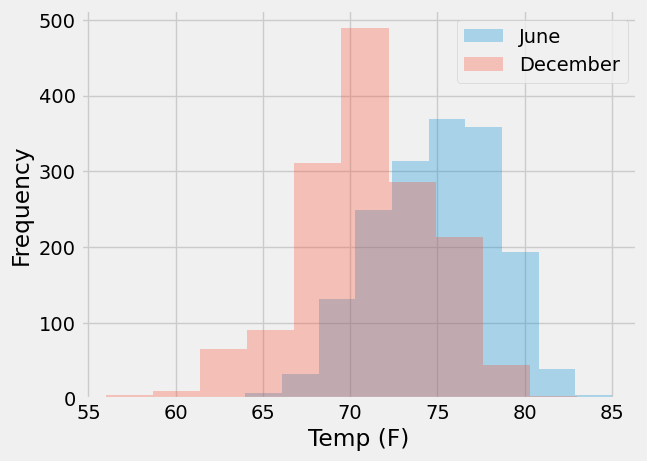

In [15]:
june.set_index(june['date'],inplace=True)
# june.sort_index(june['date'],inplace=True)
dec.set_index(dec['date'],inplace=True)
# dec.sort_index(inplace=True)

june['color'] = 'June'
dec['color'] = 'December'
df6 = pd.concat([june,dec],axis=0)
df6.sort_index(inplace=True)
# june['tobs'].hist(alpha = 0.3, label = "June")
# dec['tobs'].hist(alpha = 0.3)

plt.hist(june['tobs'],label='June',alpha=0.3)
plt.hist(dec['tobs'],label="December",alpha=0.3)
plt.legend(loc='upper right')
plt.xlabel('Temp (°F)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

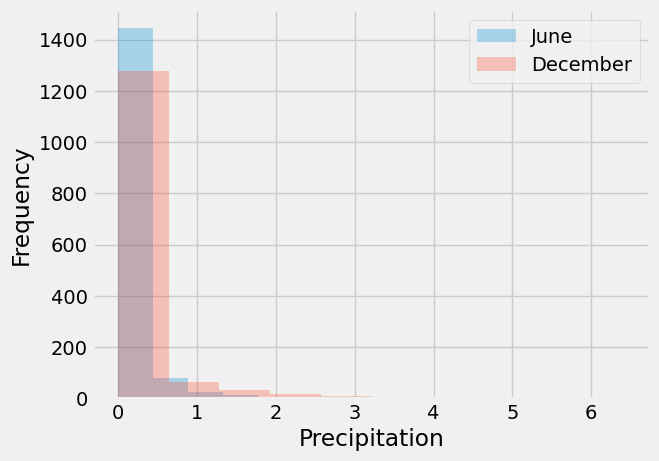

In [16]:
plt.hist(june['prcp'],label='June',alpha=0.3)
plt.hist(dec['prcp'],label="December",alpha=0.3)
plt.legend(loc='upper right')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')